In [1]:
import clustertools as ctools
import numpy as np
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014

/Users/webbjere/Codes/galpy/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/Users/webbjere/Codes/galpy/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



# Orbits and Tidal Tails

For cases where the external tidal field and a cluster's galactocentric position and velocity are known, it is possible to calculate additional cluster properties based on their orbit. As discussed in the documentation, this part of ``clustertools`` makes significant use of ``galpy`` (Bovy J., 2015, ApJS, 216, 29). In fact, several ``clustertools``  functions are simply wrappers of ``galpy`` functions that are setup to work with the ``StarCluster`` class.

To begin, lets load the final snapshot of an N-body simulation that was meant to reproduce the Galactic globular cluster Pal 5. Note one could have used ``setup_cluster`` to generate a Pal 5 - like cluster, but it would not have any tidal tails (which will also be discussed here). By default, the external tidal field is assumed to be equal to the ``MWPotential2014`` model from Bovy (2015). For all types of orbit analysis, this can be replaced with a different ``galpy`` potential using the ``pot`` variable.


0

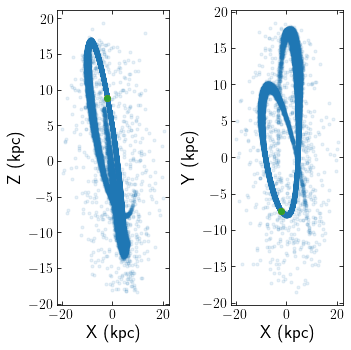

In [2]:
cluster = ctools.load_cluster('snapshot',filename='pal5.dat', units='kpckms',origin='galaxy')
ctools.starplot(cluster)

If you wish to extract the orbit of the cluster as a ``galpy`` orbit to analyze within ``galpy``, simply initialize the orbit via:

In [3]:
cluster.initialize_orbit()

After the above step, ``cluster.orbit`` now contains the ``galpy`` orbit. You can also integrate the orbit forwards to ``tfinal`` Gyr, with the option to do the standard ``galpy`` orbit plot. For illustrative purposes, I have shown how the ``pot`` variable can be used to specify the background potential.

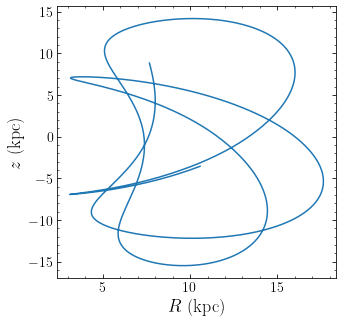

In [4]:
cluster.integrate_orbit(tfinal=1.,plot=True, pot=MWPotential2014)

If instead you wish to extract that orbital path +/- ``dt`` Gyr from the cluster's current position, you can run the below command which also has a plot option. Note the default ``dt`` is 0.1 Gyr, but for this particular snapshot a ``dt`` of 0.3 Gyr is needed to approximately cover the length of the tails.

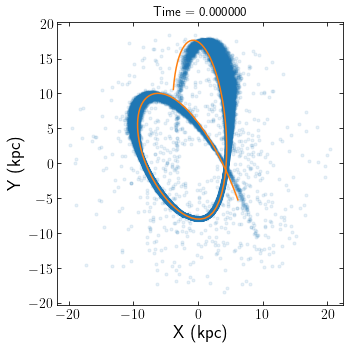

In [5]:
t,x,y,z,vx,vy,vz=cluster.orbital_path(plot=True,dt=0.3)

A related feature implemented in ``clustertools`` is the ability to find the distance of each star from the stream path (``dpath``) and its distance along the stream path from the progenitor (``dprog``). When calling ``orbital_path_match``, the timestep along the orbital path that each star is closest to is also returned (``tpath``).

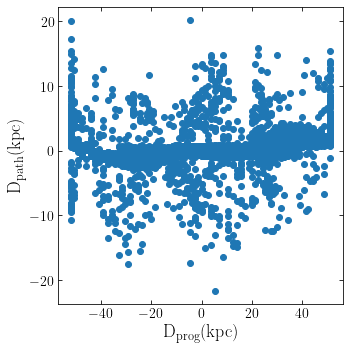

In [6]:
t,dprog,dpath=cluster.orbital_path_match(plot=True,dt=0.3)

Alternatively one can calculate what ``clustertools`` calls the tail path. To determine the tail path, ``clustertools`` first matches each star to the orbital path, bins stars along the orbital path, and then finds the mean position and velocity of stars in the same bin. The tail path better follows tidal tail stars which are generally offset from the orbital path due to them having non-zero velocities when they escape the cluster. 

DEBUG:  <clustertools.analysis.cluster.StarCluster object at 0x13aab9640> 0.3 100 [<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x132cc8700>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x132cc86a0>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x132cc8760>] False 8.0 220.0


TypeError: 'NoneType' object is not callable

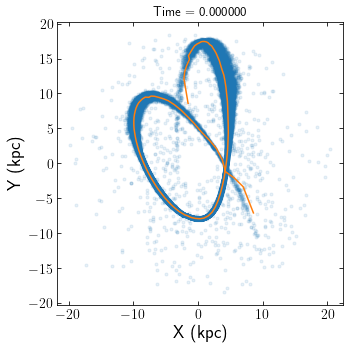

In [7]:
cluster.tail_path(plot=True,dt=0.3,filename='../images/tail_path.png')
cluster.tail_path_match(plot=True,dt=0.3,filename='../images/tail_path_match.png')

It is also possible to calculate the orbit actions associated with the progenitor using ``calc_actions``. If ``full=True``, then the orbital frequencies and periods are also returned. The variables are also stored in ``cluster.JR``,``cluster.Jphi``, etc.

In [ ]:
JR, Jphi, Jz, OR, Ophi, Oz, TR, Tphi, Tz=cluster.calc_actions(full=True)

Taking advantage of the tidal tensor calculation feature in ``galpy``, the tidal tensor or its eigenvalues can be easily output using:

In [ ]:
cluster.ttensor()

In [ ]:
cluster.ttensor(eigenval=True)

Finally, ``clustertools`` also allows for a system to be interpolated to a past or future timestep. Note this does NOT handle any internal cluster evolution, as it simply moves all cluster stars to a new orbital position. The advanage to the orbit interpolation function is that you can specificy what constitutes a tail star and integrate their orbits separately. This function allows one to more directly compare the tidal tail systems of N-body simulations to an observed cluster by ensuring the N-body system is at the exact same position as the progenitor. For example, start with the Pal 5 example above:

In [ ]:
ctools.starplot(cluster)

then interpolate the system 1 Gyr ahead in time, with tail stars defined as any star with a clustercentric radius greater than 0.1 kpc.

In [ ]:
cluster.orbit_interpolate(1.0,do_tails=True,rmax=0.1)


As you can see in the below figure, Pal 5 and its tails have been move farther along the clutser's orbit.

In [ ]:
ctools.starplot(cluster)